<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Disney TV - EDA  Cosine Similarity</b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Data Dictionary 
 
 The Data set contains 26412 observations of Peopels who plays in different Charecters.It is again most intresting to find how languages and roles are varry, how different role affect the brand equety of that perticuler Actor.


## About the dataset (Disney+ TV - EDA + Cosine Similarity N1 dataset) 

**person_id :** Unique Identifier for a Actor

**person_id :** ID (Specifically Not given The Reason Why This In data)

**Name:** Name of the Actor

**Character  :** Carecter played by Actor in Movie or Web-Series

**Role :** Role He/She played in Movie or Web-Series


## Table of Content

1. **[Import Libraries](#lib)**
2. **[Data Preparation](#prep)**
    - 2.1 - **[Read the Data](#read)**
    - 2.2 - **[Check the Data Type](#dtype)**
    - 2.3 - **[Remove Insignificant Variables](#drop)**
    - 2.4 - **[Distribution of Variables](#dist)**
    - 2.5 - **[Missing Value Treatment](#null)**
    
3. **[Question ](#q1)**
4. **[Feature Engineering](#fe)**
5. **[Cnclusion](#result)**

<a id="lib"></a>
# 1. Import Libraries

In [5]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# Set Figure Size
plt.rcParams['figure.figsize'] = [15,8]

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

In [7]:
# load the csv file
# store the data in 'actor_data'
actor_data = pd.read_csv("credits.csv")

# It is always a good practice to make copy of main dataframe
actor_data_copy = actor_data

# display first five observations using head()
actor_data.head()

,person_id,id,name,character,role
0,23433,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,5910,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR
2,23436,tm74391,Julietta Novis,Soloist (segment 'Ave Maria') (singing voice),ACTOR
3,23434,tm74391,Leopold Stokowski,Himself - Conductor of The Philadelphia Orchestra,ACTOR
4,23441,tm74391,Paul Satterfield,NaN,DIRECTOR


**Let us now see the number of variables and observations in the data.**

In [8]:
# use 'shape' to check the dimension of data
actor_data.shape

(26412, 5)

**Interpretation:** The data has 26412 observations and 5 variables.

<a id="dtype"></a>
## 2.2 Check the Data Type

In [9]:
# use 'dtypes' to check the data type of a variable
actor_data.dtypes

person_id     int64
id           object
name         object
character    object
role         object
dtype: object

**Interpretation:** The variables `person_id` is numerical.

From the above output, we see that the data type of `id`, `character`,`role` are the 'Catagorical'.

`person_id` is as Unique idetifire, Single actor get yhis unique Id We Can remove it. (Check wether It is correct or not)
We dont have Idea about id so keep it in the analysis

<a id="drop"></a>
## 2.3 Remove Insignificant Variables

In [10]:
# Check Wether the person_id and name is unique are have same 
# If they are same then remove it

# It is very simple
# 1st take the value cout of person Ids
# 2nd take the value count of name
# Sort top 10 person Id and name couts
# If both are same means one actor have unique identity

actor_data.person_id.value_counts().head(10)

528      60
529      54
31237    49
6139     47
524      43
5470     40
5481     39
18723    37
5910     37
5461     34
Name: person_id, dtype: int64

In [11]:
actor_data.name.value_counts().head(10)

Jim Cummings         60
Frank Welker         54
Clarence Nash        49
Pinto Colvig         47
Jeff Bennett         43
Bill Farmer          40
Mickie McGowan       39
Dee Bradley Baker    37
Walt Disney          37
Bob Bergen           34
Name: name, dtype: int64

**Interpritation** As we see here Both have same count it indicate that one actor have on id...Also this persone id dont have any other attachments that helps to take new inference so it is always good to remove it from the analysis.

In [12]:
# Drop the column "person_id"
actor_data = actor_data.drop("person_id",axis=1)

# Show the columns
actor_data.columns

Index(['id', 'name', 'character', 'role'], dtype='object')

<a id="dist"></a>
## 2.4 Distribution of Variables

**Distribution of Catagorical variables.**

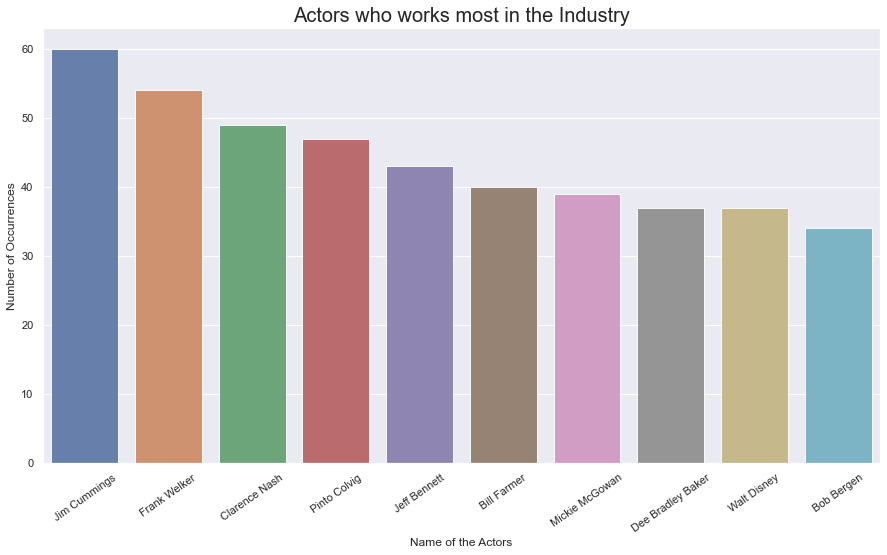

In [14]:
# We have bulk amount of data so we may take top 10 catagories from every column
# This helps to understand how catagories are influance the data

# Which actors are ther who work most in Industry, In terms of verious roles

carrier_count = actor_data['name'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Actors who works most in the Industry',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Name of the Actors', fontsize=12)
plt.xticks(rotation = 35)
plt.show()

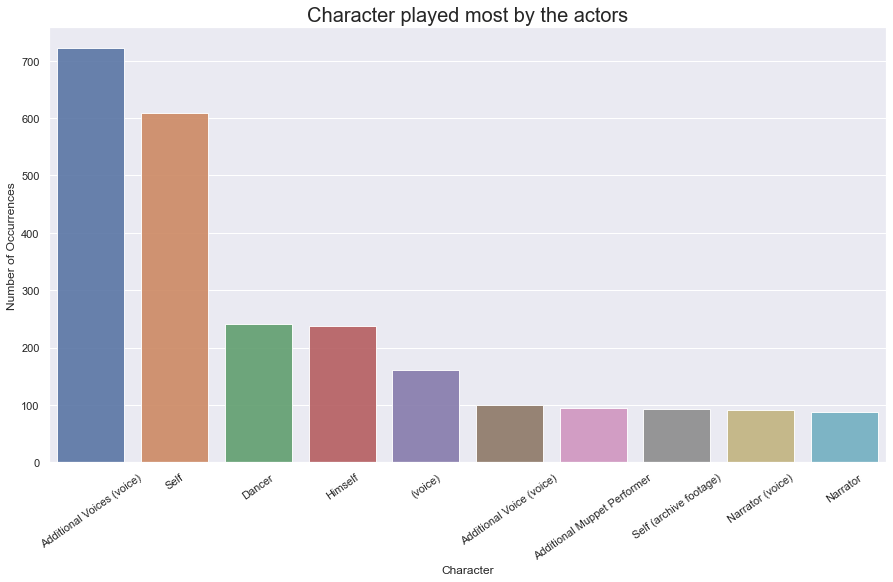

In [15]:
# Character played most by the actors

carrier_count = actor_data['character'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Character played most by the actors',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Character', fontsize=12)
plt.xticks(rotation = 35)
plt.show()


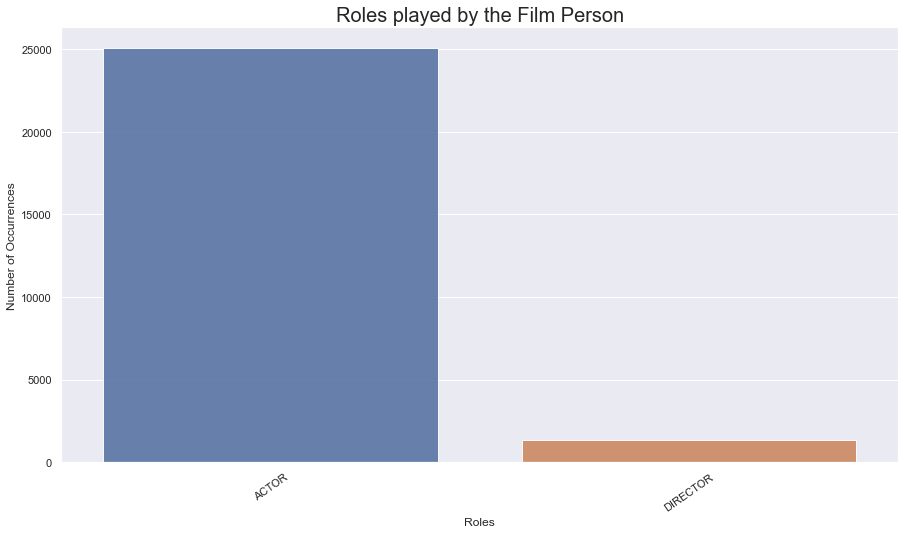

In [16]:
# Which are roles act by the peron in the Industry

carrier_count = actor_data['role'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Roles played by the Film Person',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Roles', fontsize=12)
plt.xticks(rotation = 35)
plt.show()

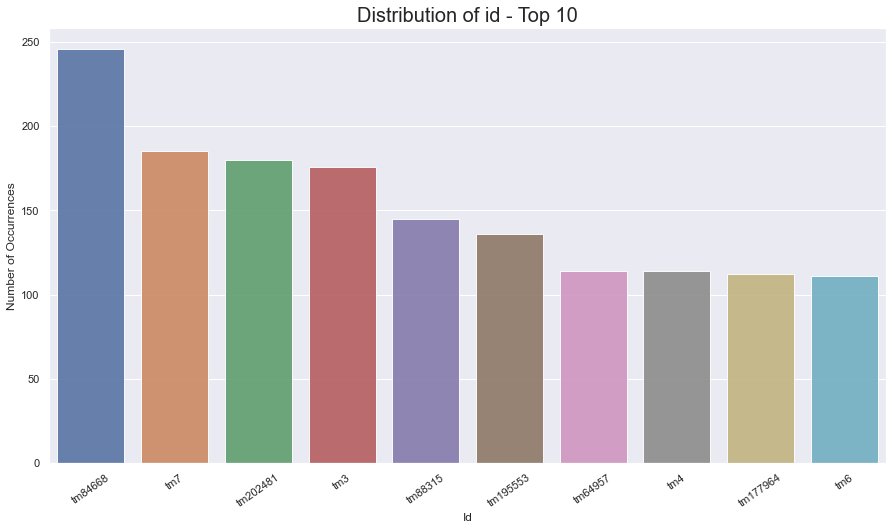

In [17]:
# How Ids are distributed

carrier_count = actor_data['id'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Distribution of id - Top 10',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Id', fontsize=12)
plt.xticks(rotation = 35)
plt.show()

#### Interpretation
**1** Jim Cummings,
Frank Welker,
Clarence Nash,
Pinto Colvig,
Jeff Bennett,
Bill Farmer,
Mickie McGowan,
Walt Disney,
Dee Bradley Baker,
Bob Bergen.
are the top 10 film person who work most in industry.

**2** Additional Voices (voice),
Self,
Dancer,
Himself,
(voice),
Additional Voice (voice),
Additional Muppet Performer,
Self (archive footage),
Narrator (voice),
Narrator. 
are the top 10 charecters played by the Film Person most.

**3** ACTOR and DIRECTOR are the Roles played by Film Person.

**4** We still dont have any clear idea about id Columns.

<a id="null"></a>
## 2.5 Missing Value Treatment

First run a check for the presence of missing values and their percentage for each column. Then choose the right approach to treat them.

In [18]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = actor_data.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (actor_data.isnull().sum()*100/actor_data.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
character,1643,6.220657
role,0,0.000000
name,0,0.000000
id,0,0.000000


As we see here only one column "charecter" had valid missing values, About 6% missing values are there. Explore and see wether any relevance it have with other columns.

In [19]:
# Step 1 Make dataframe with null only And find the relation with other colums
actor_data_nan = actor_data[actor_data.character.isnull()]
actor_data_nan.head()

,id,name,character,role
4,tm74391,Paul Satterfield,NaN,DIRECTOR
5,tm74391,Hamilton Luske,NaN,DIRECTOR
6,tm74391,Jim Handley,NaN,DIRECTOR
7,tm74391,Ford Beebe,NaN,DIRECTOR
8,tm74391,T. Hee,NaN,DIRECTOR


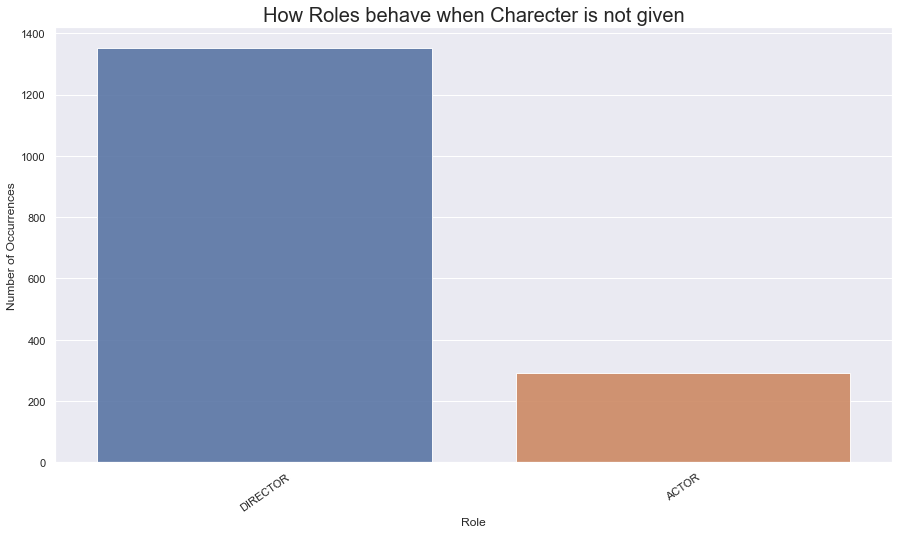

In [20]:
# Step 2 Visualize all the columns Sapearatly

# Role Behaviour

carrier_count = actor_data_nan['role'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('How Roles behave when Charecter is not given',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Role', fontsize=12)
plt.xticks(rotation = 35)
plt.show()

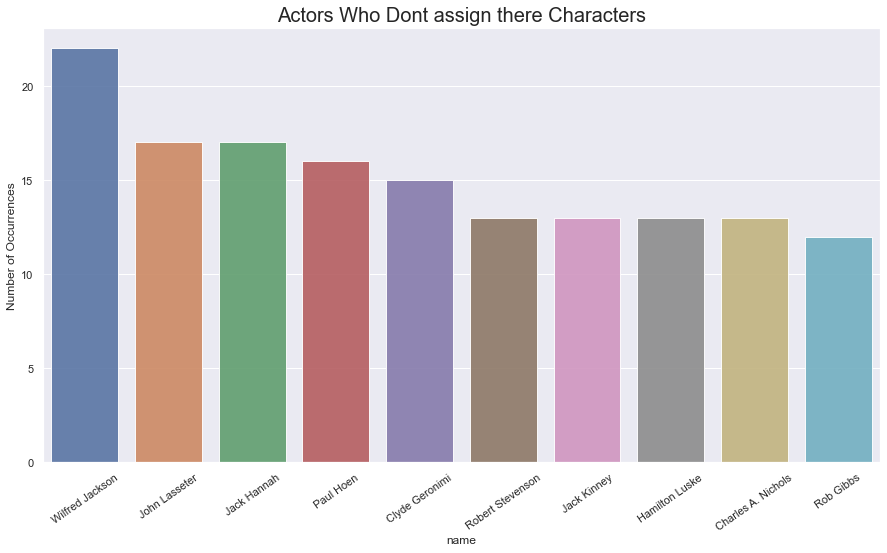

In [21]:
# Which Actor dont asign there Character

carrier_count = actor_data_nan['name'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Actors Who Dont assign there Characters',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('name', fontsize=12)
plt.xticks(rotation = 35)
plt.show()

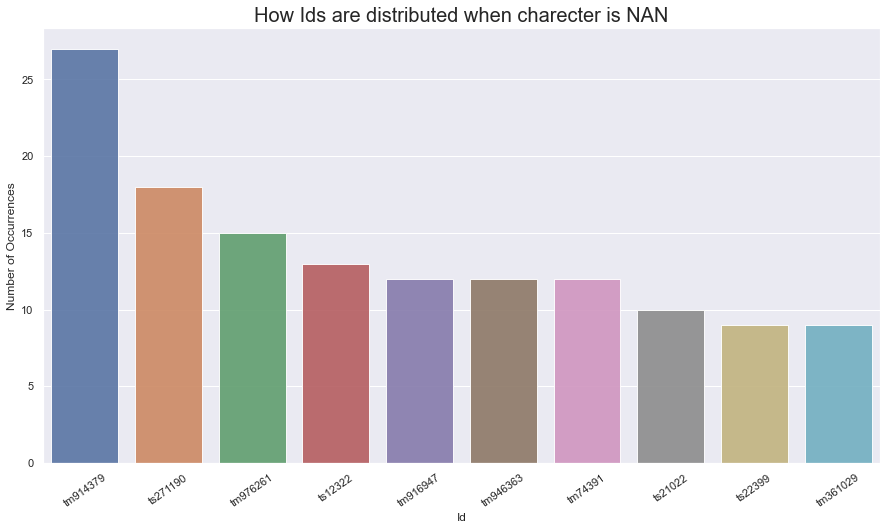

In [22]:
# How Ids are distributed when charecter is NAN

carrier_count = actor_data_nan['id'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('How Ids are distributed when charecter is NAN',fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Id', fontsize=12)
plt.xticks(rotation = 35)
plt.show()

#### Interpretation
**1** As we can see here Most of are the Directors who Didnt assign there Charecters, because they are purly Direct the movies or web-Series

**2** There are some other charecters as well who did acting but still they didnt assign there role.

#### Action
**We Need to remove all Null values Because we are here talking about Actors Brand Equety, So Directors we dont want also ther are only 200 to 300 actors who disnt assign there Charecter So This is also less then 2% of Orignal data Observations,,,,, So after concidering all points I am ging to remove all NaN**


#### Deep Analysis
**Actions**
There is also a possibility to impute those missing values for that follow the following steps.

**Step 1** Impute Cahrecter As "Direction".

**Step 2** Find the Actor who miss there Charecter name (Make sapearte dataframe).

**Step 3** Find Those all actors from main Actor Dataframe

**Step 4** Find charecter played by that charecter (Mode).

**Step 5** Impute the missing value with that Mode.

**Step 6** Those who have less the 3 impute non Spacified Or Remove them from the dataset.

In [23]:
# remove all NaN Values
actor_data = actor_data.dropna()

In [24]:
actor_data.isnull().sum()

id           0
name         0
character    0
role         0
dtype: int64

**Interpretation:** The above output shows that there are no missing values in the data.

<a id="q1"></a>
# 3 Question  Which Charecter build the face Or Brand Equety of the actor ?

In [25]:
# Step 1 Find Top 20 Charecters played Most by the Actors

actor_data.character.value_counts().head(20)

Additional Voices (voice)                 722
Self                                      609
Dancer                                    241
Himself                                   238
(voice)                                   161
Additional Voice (voice)                  100
Additional Muppet Performer                95
Self (archive footage)                     93
Narrator (voice)                           91
Narrator                                   87
Additional Voice Talent (voice)            85
Dancer and Chorus Performer                79
Ewok                                       69
Herself                                    62
Additional Muppet Performer (voice)        59
Additional Voices (voice) (uncredited)     51
Debutante                                  50
On-Screen Musician                         45
Additional Voices  (voice)                 42
Stormtrooper                               37
Name: character, dtype: int64

**Top 20 Charecters**
Top 20 Characters Playes Most in Film Industry

**Charecters how played by actors related to face value**
Characters build face Value (Related To brand Equety)


In [26]:
# Step 2 make new dataframe for those selected catagaries

self = actor_data[actor_data.character == "Self"]
Dancer = actor_data[actor_data.character == "Dancer"]
Himself = actor_data[actor_data.character == "Himself"]
Narrator = actor_data[actor_data.character == "Narrator"]
self_af = actor_data[actor_data.character == "Self(Arechive Footage)"]
DCP = actor_data[actor_data.character == "Dancer and Chorus Performer"]
Herself = actor_data[actor_data.character == "Herself"]
OSM = actor_data[actor_data.character == "On-Screen Musician"]

character_selected = pd.concat([self,Dancer,Himself,Narrator,self_af,DCP,Herself,OSM])

character_selected.head()

,id,name,character,role
1188,ts28051,Bonnie Lynn Fields,Self,ACTOR
1189,ts28051,Eileen Diamond,Self,ACTOR
1190,ts28051,Patricia Morrow,Self,ACTOR
1191,ts28051,J. Pat O'Malley,Self,ACTOR
1192,ts28051,Judy Nugent,Self,ACTOR


In [27]:
# Find the Shape of Data\
character_selected.shape

(1361, 4)

<a id="fe"></a>
# 4  Feature Engineering

In [28]:
# Step 3 Explore the Features

# id

character_selected.id.value_counts()

tm84668      170
tm150669      51
tm310197      43
tm1092922     38
tm211971      36
tm150667      31
tm165905      30
ts28051       29
tm268063      29
tm85690       26
tm146421      23
tm114449      21
tm167908      19
tm1109460     18
tm1165423     18
tm882857      17
tm406066      16
tm84279       15
tm996838      15
ts217745      14
tm842501      14
tm376183      14
tm165063      13
tm983665      13
tm145073      13
tm1164200     12
tm914724      12
tm190977      12
tm76258       12
tm885652      11
tm848055      11
tm1184089     11
tm1104734     11
tm1168196     11
tm941826      11
tm1941        11
tm978794      11
tm1137323     10
tm855130       9
tm27689        9
tm425918       8
tm826979       8
tm1123813      8
tm1064162      8
tm233677       7
tm164345       7
tm118928       7
tm1151153      7
tm1074538      7
tm114017       7
tm327380       7
tm150525       7
tm177964       7
tm1076899      6
ts20839        6
tm933514       6
ts271431       6
tm188023       6
tm1133185     

In [29]:
# Do Feature Engineering
character_selected['id_suffix'] = character_selected['id'].str[:2]
character_selected.head()

,id,name,character,role,id_suffix
1188,ts28051,Bonnie Lynn Fields,Self,ACTOR,ts
1189,ts28051,Eileen Diamond,Self,ACTOR,ts
1190,ts28051,Patricia Morrow,Self,ACTOR,ts
1191,ts28051,J. Pat O'Malley,Self,ACTOR,ts
1192,ts28051,Judy Nugent,Self,ACTOR,ts


In [30]:
character_selected['id_num'] = character_selected['id'].str[2:]
character_selected.head()

,id,name,character,role,id_suffix,id_num
1188,ts28051,Bonnie Lynn Fields,Self,ACTOR,ts,28051
1189,ts28051,Eileen Diamond,Self,ACTOR,ts,28051
1190,ts28051,Patricia Morrow,Self,ACTOR,ts,28051
1191,ts28051,J. Pat O'Malley,Self,ACTOR,ts,28051
1192,ts28051,Judy Nugent,Self,ACTOR,ts,28051


In [31]:
# Remove the Id Column and index from character_selected dataframe
character_selected = character_selected.drop("id",axis=1)

# remove index
character_selected = character_selected.reset_index(drop = True)

In [32]:
character_selected.head()

,name,character,role,id_suffix,id_num
0,Bonnie Lynn Fields,Self,ACTOR,ts,28051
1,Eileen Diamond,Self,ACTOR,ts,28051
2,Patricia Morrow,Self,ACTOR,ts,28051
3,J. Pat O'Malley,Self,ACTOR,ts,28051
4,Judy Nugent,Self,ACTOR,ts,28051


In [33]:
# Explore those new columns

# id Suffix
character_selected.id_suffix.value_counts()

tm    1221
ts     140
Name: id_suffix, dtype: int64

In [34]:
# id num
character_selected.id_num.value_counts().head()

84668      170
150669      51
310197      43
1092922     38
211971      36
Name: id_num, dtype: int64

#### Interpretation
`TM` stands for trademark. The TM symbol (often seen in superscript like this: TM) is usually used in connection with an unregistered mark—a term, slogan, logo, or other indicator—to provide notice to potential infringers that common law rights in the mark are claimed

`TS` telesync--
A telesync (TS) is a bootleg recording of a film recorded in a movie theater, often (although not always) filmed using a professional camera on a tripod in the projection booth.

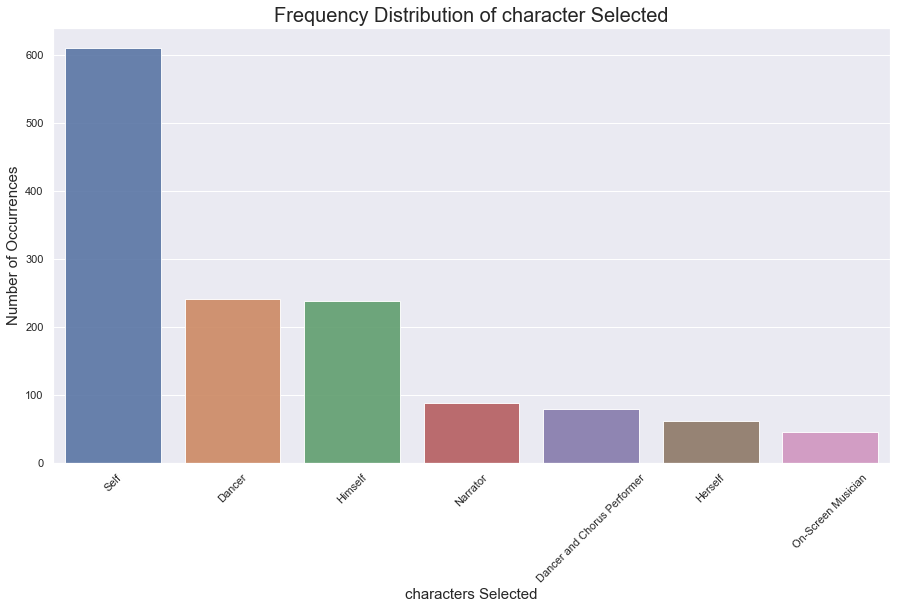

In [35]:
# Visualize the datapoints

carrier_count = character_selected['character'].value_counts().head(10)
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of character Selected', fontsize=20)
plt.ylabel('Number of Occurrences', fontsize=15)
plt.xlabel('characters Selected', fontsize=15)
plt.xticks(rotation = 45)
plt.show()

In [36]:
# Step 4 find the actors who have most of these
character_selected.head()

,name,character,role,id_suffix,id_num
0,Bonnie Lynn Fields,Self,ACTOR,ts,28051
1,Eileen Diamond,Self,ACTOR,ts,28051
2,Patricia Morrow,Self,ACTOR,ts,28051
3,J. Pat O'Malley,Self,ACTOR,ts,28051
4,Judy Nugent,Self,ACTOR,ts,28051


In [37]:
# Use the cross tab
pd.crosstab(character_selected.name,character_selected.id_suffix)

id_suffix,tm,ts
name,,
"""Pike"" Mike Harrison",0,1
Aaron Dessner,1,0
Aaron Hamilton,1,0
Aaron Nedrick,1,0
Abbey Lincoln,1,0
Adam Galbraith,1,0
Adam Lambert,2,0
Adam Sergison,1,0
Adam Trent,1,0


In [38]:
# Use the cross tab
# Id suffix - Character
pd.crosstab(character_selected.character,character_selected.id_suffix)

id_suffix,tm,ts
character,,
Dancer,241,0
Dancer and Chorus Performer,79,0
Herself,52,10
Himself,217,21
Narrator,65,22
On-Screen Musician,45,0
Self,522,87


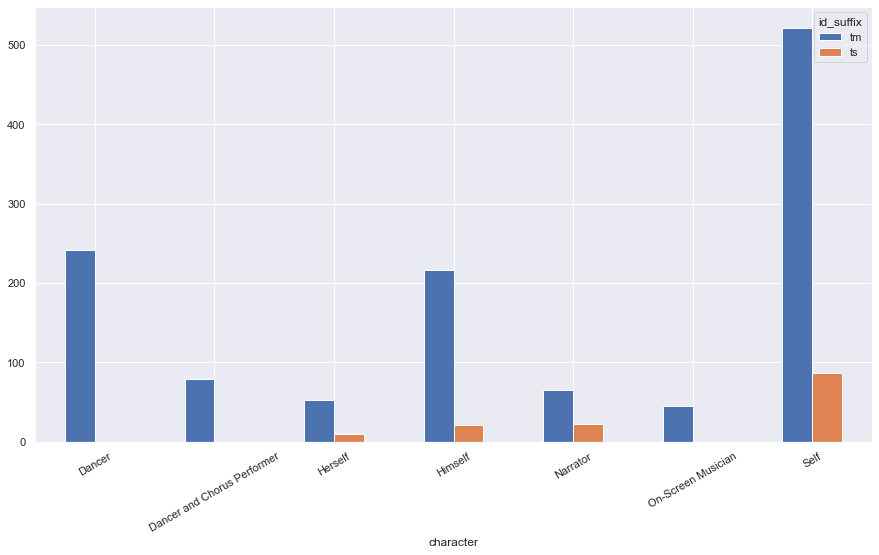

In [39]:
# Visualize it
pd.crosstab(character_selected.character,character_selected.id_suffix).plot.bar()
plt.xticks(rotation = 30)
plt.show()

In [40]:
character_selected.head()

,name,character,role,id_suffix,id_num
0,Bonnie Lynn Fields,Self,ACTOR,ts,28051
1,Eileen Diamond,Self,ACTOR,ts,28051
2,Patricia Morrow,Self,ACTOR,ts,28051
3,J. Pat O'Malley,Self,ACTOR,ts,28051
4,Judy Nugent,Self,ACTOR,ts,28051


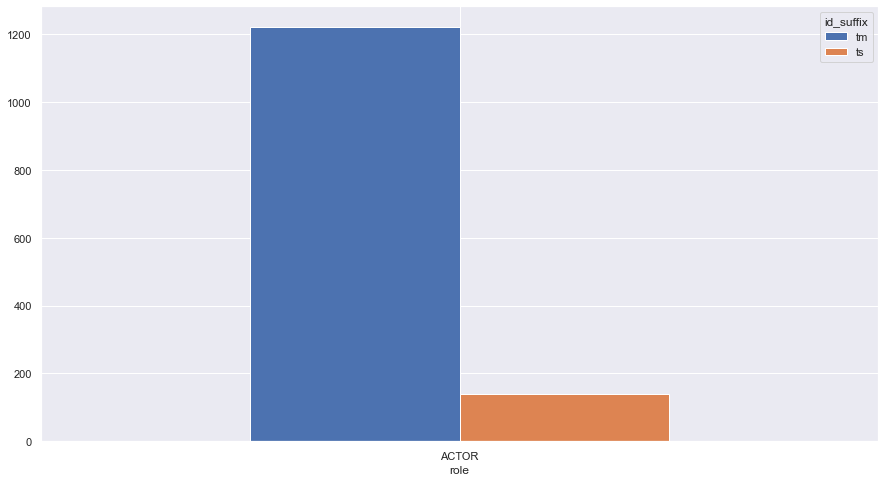

In [41]:
# Role - suffix
pd.crosstab(character_selected.role,character_selected.id_suffix).plot.bar()
plt.xticks(rotation = 0)
plt.show()

<AxesSubplot:xlabel='character'>

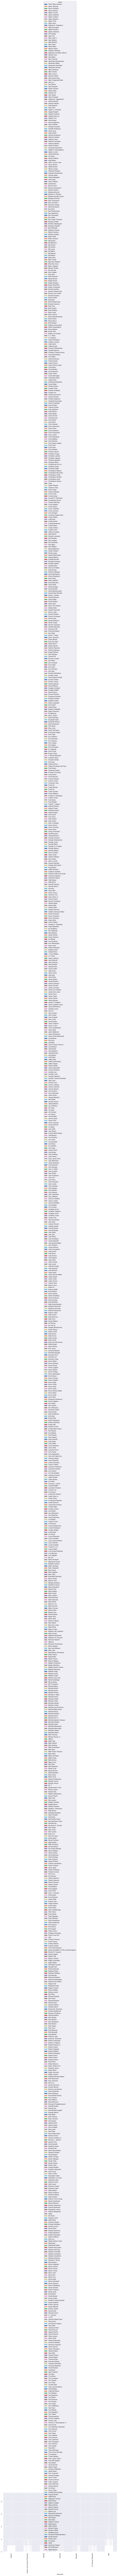

In [42]:
pd.crosstab(character_selected.character,character_selected.name).plot.bar()

#### Interpretation
so after doing Feature Engineering I conclude that for greater brand equety film must thave TM (trade Mark).

In [43]:
character_selected.head()

,name,character,role,id_suffix,id_num
0,Bonnie Lynn Fields,Self,ACTOR,ts,28051
1,Eileen Diamond,Self,ACTOR,ts,28051
2,Patricia Morrow,Self,ACTOR,ts,28051
3,J. Pat O'Malley,Self,ACTOR,ts,28051
4,Judy Nugent,Self,ACTOR,ts,28051


In [44]:
actor_data.head(2)

,id,name,character,role
0,tm74391,Deems Taylor,Narrator - Narrative Introductions,ACTOR
1,tm74391,Walt Disney,Mickey Mouse (segment 'The Sorcerer's Apprenti...,ACTOR


In [45]:
print("Actor have highest brand equety is ",character_selected.name.value_counts().head(1).index[0])

Actor have highest brand equety is  Winston Hibler


In [46]:
a_WH = actor_data[actor_data.name == "Winston Hibler"]
a_WH.head(100)

,id,name,character,role
274,tm60613,Winston Hibler,Narrator,ACTOR
2077,tm124426,Winston Hibler,Narrator,ACTOR
2174,tm104617,Winston Hibler,Narrator,ACTOR
2197,tm19764,Winston Hibler,Narrator,ACTOR
2216,tm90286,Winston Hibler,Narrator,ACTOR
2218,tm111322,Winston Hibler,Narrator,ACTOR
2255,tm47139,Winston Hibler,Narrateur,ACTOR
2362,tm58414,Winston Hibler,Narrator,ACTOR
2413,tm137469,Winston Hibler,Narrator,ACTOR
2438,tm55594,Winston Hibler,Narrator,ACTOR


In [47]:
# Find actor have highest face value
print("Actor with higest face value is",self.name.value_counts().head(1).index[0])

Actor with higest face value is Jan Pol


In [48]:
# Find Charecter who plays most important role in deciding of brand equety
print("Charecter who decide the brand equety is",character_selected.character.value_counts().head(1).index[0])


Charecter who decide the brand equety is Self


<a id="result"></a>
# 5 Conclusion

### About Actor.

**1st** `Winston Hibler` is the actor have highest brand Equety.

**2nd** So here `Jan Pol` is the actor have highes face value. On Screen 

**3rd** This actor have a pattern, all movies he did played by himself, meance his screen time is most as compair to others. because of Psychlogy says that when we see and listen sombady on screen manier time, we fetch his face as labled Charecter.as you can see in above Table



### About Film Style

**1st** Film style must be `TM (Trade Mark)` because in terms of Film industry There are some standered Those helps us to rank the Movie or cahrector so it needs to be `TM`.

### About Charecter

**1st** So here `Jan Pol` is the actor have highes face value. On Screen

**2nd**  `Narrator` is the Charecter he played so again story telling is and charector plaing is influance here.

## Action

**Actor need to work in trad mark level movie, he need to play his charecter on screen (self), if possible do Narrations on stage**

<table align="center" width=100%>
    <tr>
        </td>
            </td>
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> END </b>
                </font>
            </div>
        </td>
    </tr>
</table>